# Pupillometry
This notebook takes in three csv files taken from the Pupil Recordings you have exported in Pupil Player. These are:
- `annotations.csv` (contains annotations that indicates important events during the recording)
- `pupil_positions.csv` (contains raw data in regards to the pupil throughout the recording)
- `info.player.json` (contains system and sync time used to format the recording timestamps)

In [9]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import json
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# File Paths
info_player_filePath = 'source/info.player.json'
pupil_csv_filePath = 'source/pupil_positions.csv'
annotations_filepath = 'source/annotations.csv'

In [10]:
# Converting timestamps into time (starting from 0)
def convert_timestamps_to_time(df, timestamp_column, offset):
    df['time'] = df[timestamp_column] + offset
    df['time'] -= df['time'].min()
    return df

In [11]:
with open(info_player_filePath, 'r') as file:
    data = json.load(file)

start_time_synced_s = data.get('start_time_synced_s')
start_time_system_s = data.get('start_time_system_s')

offset = start_time_system_s - start_time_synced_s
print(f"Offset between system and synced start time: {offset}")

pupil_df = pd.read_csv(pupil_csv_filePath)
print(f"There is a total of {len(pupil_df)} in the Pupil DataFrame")

pupil_df = convert_timestamps_to_time(pupil_df, 'pupil_timestamp', offset)
print(pupil_df['time'])

Offset between system and synced start time: 1709032090.0729036
There is a total of 16348 in the Pupil DataFrame
0         0.000000
1         0.000000
2         0.004189
3         0.004189
4         0.007928
           ...    
16343    35.112041
16344    35.116009
16345    35.116009
16346    35.120545
16347    35.120545
Name: time, Length: 16348, dtype: float64


In [12]:
left_df = pupil_df[pupil_df['eye_id'] == 0]
right_df = pupil_df[pupil_df['eye_id'] == 1]

print(left_df)
print(right_df)

       pupil_timestamp  world_index  eye_id  confidence  norm_pos_x  \
0         22295.558619            0       0    0.866569    0.580576   
1         22295.558619            0       0    0.866569    0.580550   
4         22295.566547            1       0    0.979308    0.580254   
5         22295.566547            1       0    0.979308    0.580188   
8         22295.574545            1       0    0.837793    0.580522   
...                ...          ...     ...         ...         ...   
16337     22330.658746         1639       0    0.916593    0.575861   
16340     22330.666703         1639       0    0.936560    0.576551   
16341     22330.666703         1639       0    0.936560    0.576572   
16344     22330.674628         1640       0    0.923450    0.575466   
16345     22330.674628         1640       0    0.923450    0.575442   

       norm_pos_y   diameter                 method  ellipse_center_x  \
0        0.453581  25.451279  pye3d 0.3.0 real-time        111.470600   
1

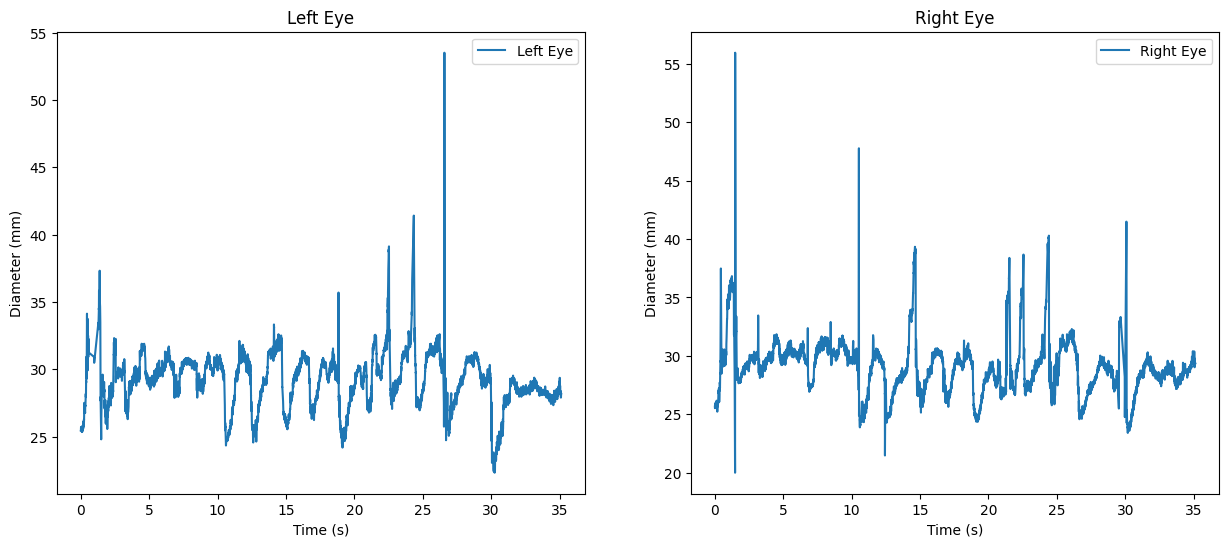

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(left_df['time'], left_df['diameter'], label='Left Eye')
axs[0].set_title('Left Eye')

axs[1].plot(right_df['time'], right_df['diameter'], label='Right Eye')
axs[1].set_title('Right Eye')

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Diameter (mm)')
    ax.legend()

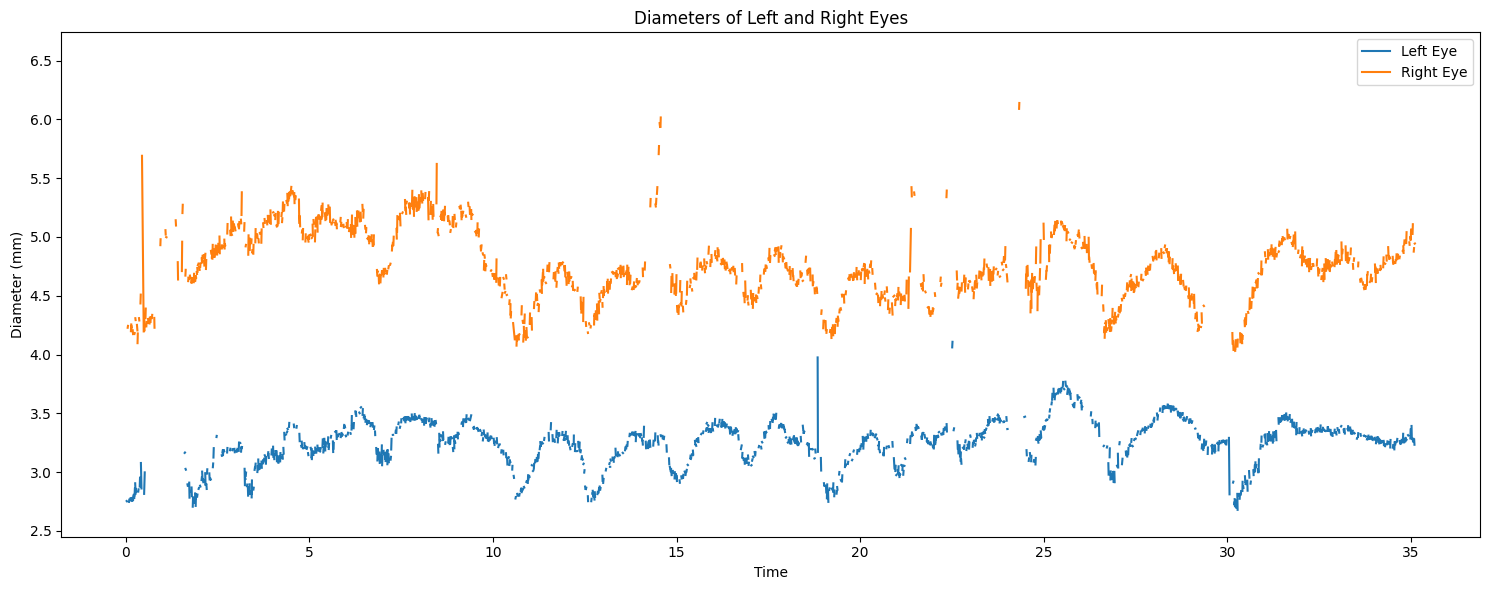

In [14]:
# Plot both smoothed diameters on the same graph
plt.figure(figsize=(15, 6))

plt.plot(left_df['time'], left_df['diameter_3d'], label='Left Eye')
plt.plot(right_df['time'], right_df['diameter_3d'], label='Right Eye')

plt.title('Diameters of Left and Right Eyes')
plt.xlabel('Time')
plt.ylabel('Diameter (mm)')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\jhund\AppData\Local\Temp\ipykernel_12632\3963993992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['smoothed_diameter'] = left_df['diameter_3d'].rolling(window=window).median()
C:\Users\jhund\AppData\Local\Temp\ipykernel_12632\3963993992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['smoothed_diameter'] = right_df['diameter_3d'].rolling(window=window).median()


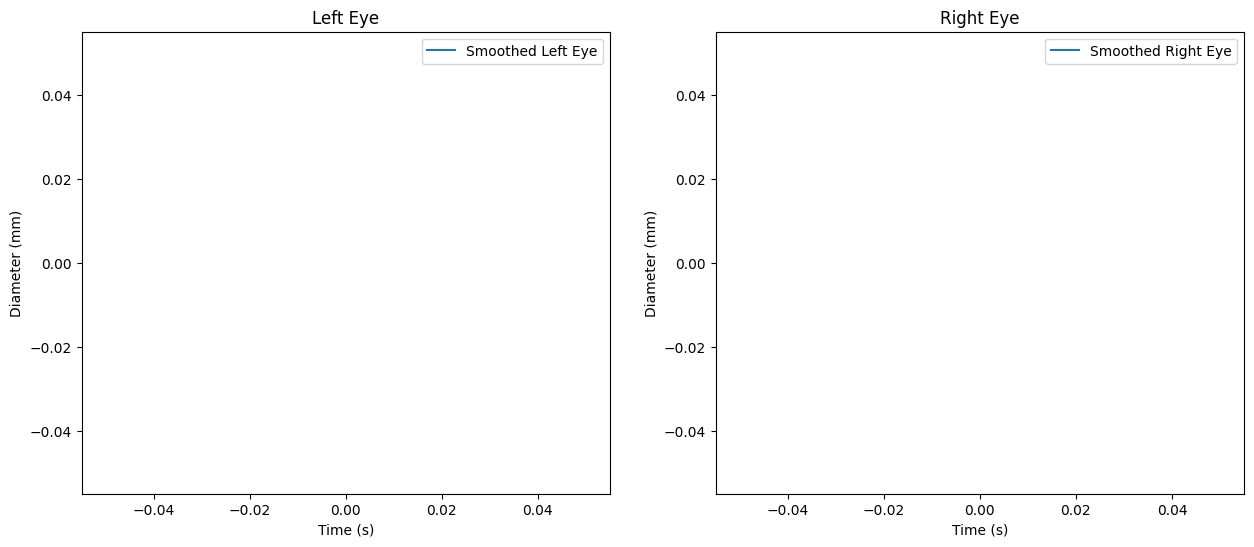

In [15]:
window = 10
left_df['smoothed_diameter'] = left_df['diameter_3d'].rolling(window=window).median()
right_df['smoothed_diameter'] = right_df['diameter_3d'].rolling(window=window).median()

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(left_df['time'], left_df['smoothed_diameter'], label='Smoothed Left Eye')
axs[0].set_title('Left Eye')

axs[1].plot(right_df['time'], right_df['smoothed_diameter'], label='Smoothed Right Eye')
axs[1].set_title('Right Eye')

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Diameter (mm)')
    ax.legend()

C:\Users\jhund\AppData\Local\Temp\ipykernel_12632\463725512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['smoothed_diameter'] = left_df['diameter'].rolling(window=window).mean()
C:\Users\jhund\AppData\Local\Temp\ipykernel_12632\463725512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['smoothed_diameter'] = right_df['diameter'].rolling(window=window).mean()


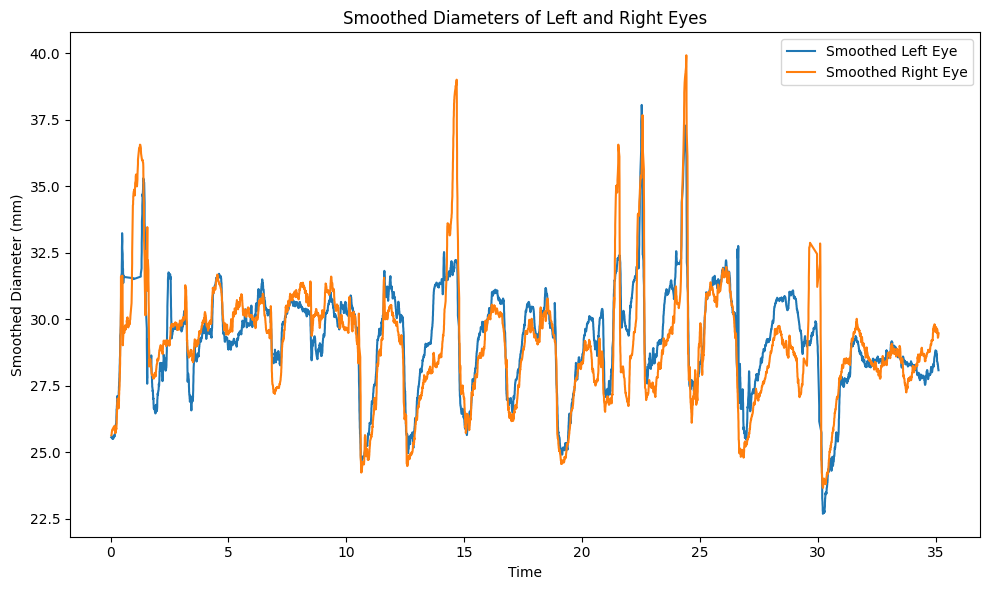

In [16]:
window = 10

# Calculate smoothed diameters
left_df['smoothed_diameter'] = left_df['diameter'].rolling(window=window).mean()
right_df['smoothed_diameter'] = right_df['diameter'].rolling(window=window).mean()

# Plot both smoothed diameters on the same graph
plt.figure(figsize=(10, 6))

plt.plot(left_df['time'], left_df['smoothed_diameter'], label='Smoothed Left Eye')
plt.plot(right_df['time'], right_df['smoothed_diameter'], label='Smoothed Right Eye')

plt.title('Smoothed Diameters of Left and Right Eyes')
plt.xlabel('Time')
plt.ylabel('Smoothed Diameter (mm)')
plt.legend()

plt.tight_layout()
plt.show()